# Aufgabe 5: Batch System

SDIL bietet ein sogenanntes Batch-System, um die SDIL-Resourcen effizient zu nutzen und eine Störung zwischen Nutzern zu vermeiden. 

In dieser Aufgabe sollen die Klassifikationsaufgaben aus [Aufgabe 3](./Exercise3.ipynb) mittels dieses Batch-Systems ausgeführt werden. Die nötigen Schritte sollen in diesem Notebook beschrieben werden.

## Setup

Zur Benutzung des Batch-Systems sind laut dem Tutorial "How To Use Batch System on SDIL" folgende Dinge nötig:

1. Eine Conda Environment
2. Eine Job-Datei
3. Eine Script-Datei
4. Die auszuführende Python-Datei

Um den Inhalt einiger Dateien zu zeigen, wird die Funktion `print_file` definiert, welche den Inhalt von Dateien anzeigen kann.

In [1]:
def print_file(path):
    f = open(path, 'r')
    print(f.read())
    f.close()

###### Conda Environment

Wir verwenden die gleiche Conda Environment wie in Aufgabe 1 mit dem Namen `aufgabe1`.

###### Job-Datei

Eine Job-Datei mit dem Namen `job_exercise5.job` wurde wie im Tutorial beschrieben angelegt. Im Folgenden ist ihr Inhalt zu sehen. Dabei werden 32 CPU-Kerne angefragt, da in Aufgabe 3 `n_jobs` maximal auf 32 gesetzt wird.

In [2]:
print_file('Exercise5/job_exercise5.job')

cmd = Exercise5/script_exercise5.sh
request_memory = 16GB
request_cpus = 32 
+REQUESTED_WALLTIME = 4
notify_user = uiuqb@student.kit.edu
notification = Always
when_to_transfer_output = ON_EXIT_OR_EVICT
should_transfer_files = YES
transfer_input_files = data
output = Exercise5/log/$(Cluster)-$(Process)_job.out
error = Exercise5/log/$(Cluster)-$(Process)_job.error
log = Exercise5/log/$(Cluster)- $(Process)_job.log
queue 1



###### Script-Datei

Eine Script-Datei mit dem Namen `script_exercise5.sh` wurde wie im Tutorial beschrieben angelegt. Im Folgenden ist ihr Inhalt zu sehen:

In [3]:
print_file('Exercise5/script_exercise5.sh')

#!/usr/bin/bash

#setup anaconda
. /etc/profile.d/anaconda.sh
setup-anaconda
# activate conda env
source activate aufgabe1

# run python
python /smartdata/uiuqb/smart-data-analytics/Uebung2/Exercise5/Exercise3.py



###### Python-Datei

Ein Python-Skript mit dem Namen `Exercise3.py` wurde mit den folgenden Befehlen erstellt und in den Ordner `Exercise5` verschoben:

1. Erstellen: `jupyter nbconvert --to script Exercise3.ipynb`
2. Verschieben: `mv Exercise3.py Exercise5/Exercise3.py`

## Ausführen des Jobs

Zum Ausführen des Jobs wurde folgender Befehl ausgeführt:  

    condor_submit Exercise5/job_exercise5.job

## Auswertung der Ergebnisse

Die Ergebnisse werden vom Batch-Job in den Ordner `log` geschrieben. 
Beispielsweise sind in der Datei [105434-0_job.out](Exercise5/log/105106-0_job.out) die Konsolenausgaben der Ausführung zu sehen.

Da uns aufgefallen ist, dass die Ausführungszeiten leicht variieren, haben wir den Batch-Job 3 Mal ausgeführt:

- [105434-0_job.out](Exercise5/log/105106-0_job.out)
- [105435-0_job.out](Exercise5/log/105111-0_job.out)
- [105436-0_job.out](Exercise5/log/105112-0_job.out)

Da wir auf die Reproduzierbarkeit unserer Ergebnisse geachtet haben, ist bei allen Ausgaben die selben Ergebnisse zu beobachten.  
Lediglich die Laufzeiten unterscheiden sich.

Diese Laufzeiten werden im Folgenden mithilfe von `pandas` graphisch ausgewertet.  
Aus diesem Grund muss diese Bibliothek hier importiert werden.

In [4]:
# Import Pandas to read data
import pandas as pd

#### Iris Flower Dataset

Zunächst sollen die Laufzeiten für den Iris-Datensatz ausgewertet werden. Dazu werden zunächst die entsprechenden Zeilen aus den Log-Dateien gelesen.

In [5]:
# Read Data from log files
times_iris_1 = pd.read_csv('Exercise5/log/105434-0_job.out', delimiter=" ", skipinitialspace=True, nrows=32)
times_iris_2 = pd.read_csv('Exercise5/log/105435-0_job.out', delimiter=" ", skipinitialspace=True, nrows=32)
times_iris_3 = pd.read_csv('Exercise5/log/105436-0_job.out', delimiter=" ", skipinitialspace=True, nrows=32)

Anschließendes aggregieren der Daten in einen einzigen `Dataframe`:

In [6]:
# Aggregate data into one dataframe
times_iris = times_iris_1
times_iris['times2'] = times_iris_2['times']
times_iris['times3'] = times_iris_3['times']

Definieren der Funktion zum Plotten der Laufzeiten:

In [7]:
# Define function to visualize the computing times
def plot_times(times):
    # Create the plot
    plot = times.plot(x='n_jobs', legend=False)
    # Set plot labels
    plot.set(xlabel="n_jobs", ylabel="Time in seconds")

- _Plot der einzelnen Laufzeiten_

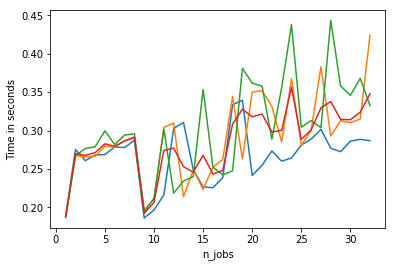

In [14]:
plot_times(times_iris)

- _Plot der durchschnittlichen Laufzeiten_ (mit vorheriger Berechnung)

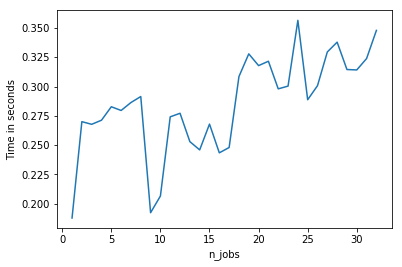

In [9]:
times_iris['average'] = times_iris.drop('n_jobs', axis=1).mean(axis=1)
plot_times(times_iris[['n_jobs', 'average']])

Es ist zu erkennen, dass für den Iris-Flower-Datensatz auch bei einer CPU-Anzahl von 32 eine Erhöhung des `n_jobs`-Parameters negative Auswirkungen auf die Laufzeit hat.

Interessant ist, dass die Laufzeit für 9 Kerne trotzdem ca. genau so schnell ist wie für einen Kern.

Das könnte darauf zurückzuführen sein, dass es sich hierbei um einen eher kleinen Datensatz handelt und deshalb die Berechnung für das Multiprocessing überproportional viel Laufzeit benötigt.

#### Heart Disease UCI Dataset

Abschließend sollen die Laufzeiten für den Heart-Desease-Datensatz ausgewertet werden. Dazu werden zunächst die entsprechenden Zeilen aus den Log-Dateien gelesen.

In [10]:
times_heart_1 = pd.read_csv('Exercise5/log/105434-0_job.out', delimiter=" ", skipinitialspace=True, skiprows=37, nrows=32)
times_heart_2 = pd.read_csv('Exercise5/log/105435-0_job.out', delimiter=" ", skipinitialspace=True, skiprows=37, nrows=32)
times_heart_3 = pd.read_csv('Exercise5/log/105436-0_job.out', delimiter=" ", skipinitialspace=True, skiprows=37, nrows=32)

Anschließendes aggregieren der Daten in einen einzigen `Dataframe`:

In [11]:
times_heart = times_heart_1
times_heart['times2'] = times_heart_2['times']
times_heart['times3'] = times_heart_3['times']

- _Plot der einzelnen Laufzeiten_

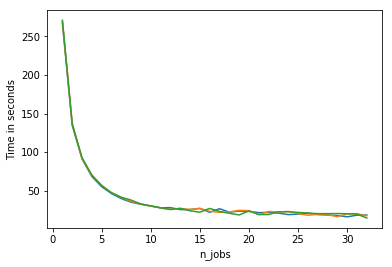

In [12]:
plot_times(times_heart)

- _Plot der durchschnittlichen Laufzeiten_ (mit vorheriger Berechnung)

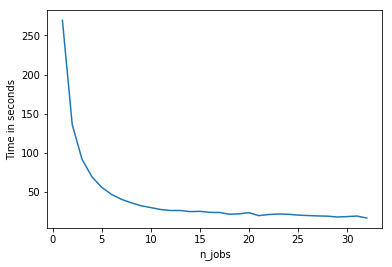

In [13]:
times_heart['average'] = times_heart.drop('n_jobs', axis=1).mean(axis=1)
plot_times(times_heart[['n_jobs', 'average']])

Es ist zu erkennen, dass bei diesem Datensatz und einer CPU-Anzahl von 32 das Erhöhen des `n_jobs`-Parameters zu küzeren Laufzeiten führt. Es lohnt sich also, bei großen Datensätzen diese Möglichkeiten von SDIL zu nutzen.